# 🩺 BREAST CANCER DETECTION


# This notebook addresses SDG 3: Good Health and Well-being,
# by building ML models to assist with early breast cancer detection.
# Dataset: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset


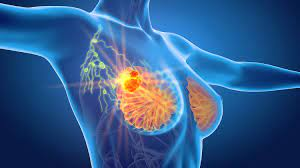

# LOAD THE DATA

In [1]:
# CA
#  📦 Import more libraries for presenting good visualizations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
#  Load Dataset
df = pd.read_csv("/content/data.csv")

In [3]:
print("="*120)
print("CHECKING DATA SET")
print("="*120)

CHECKING DATA SET


In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 32)

In [7]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# CA
print("="*100)
print("🧹 PREPROCESSING DATA")
print("="*100)

🧹 PREPROCESSING DATA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# CA
# Data Preprocessing
# Check for null values
print("Missing values:")
print(df.isnull().sum())


Missing values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
df['diagnosis']=df['diagnosis'].map({'M': 0,'B': 1})

So,we have no missing values, hence we are good to go

# EXPLORATORY DATA ANALYSIS
Diagnosis Distribution

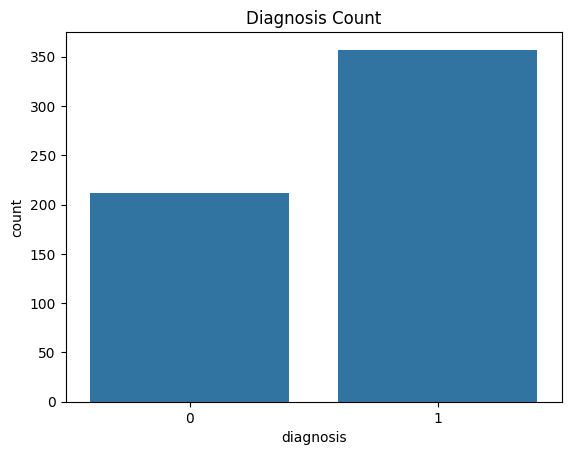

diagnosis
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Count")
plt.show()

print(df['diagnosis'].value_counts(normalize=True) * 100)


The bar plot you've shown is titled "Diagnosis Count" and represents the frequency of two categories in the dataset: Malignant (M) and Benign (B) breast cancer diagnoses.

X-axis (diagnosis):
Shows the two possible classes:

M: Malignant (cancerous)

B: Benign (non-cancerous)

Y-axis (count):
Indicates the number of samples for each class in the dataset.

Insights from the Chart

Diagnosis	Count	Description
M	~212	Malignant tumors are fewer in number.

B	~357	Benign tumors are more common in the dataset.

The dataset is slightly imbalanced, with more benign cases (B) than malignant (M).



Distribution of Numeric Features

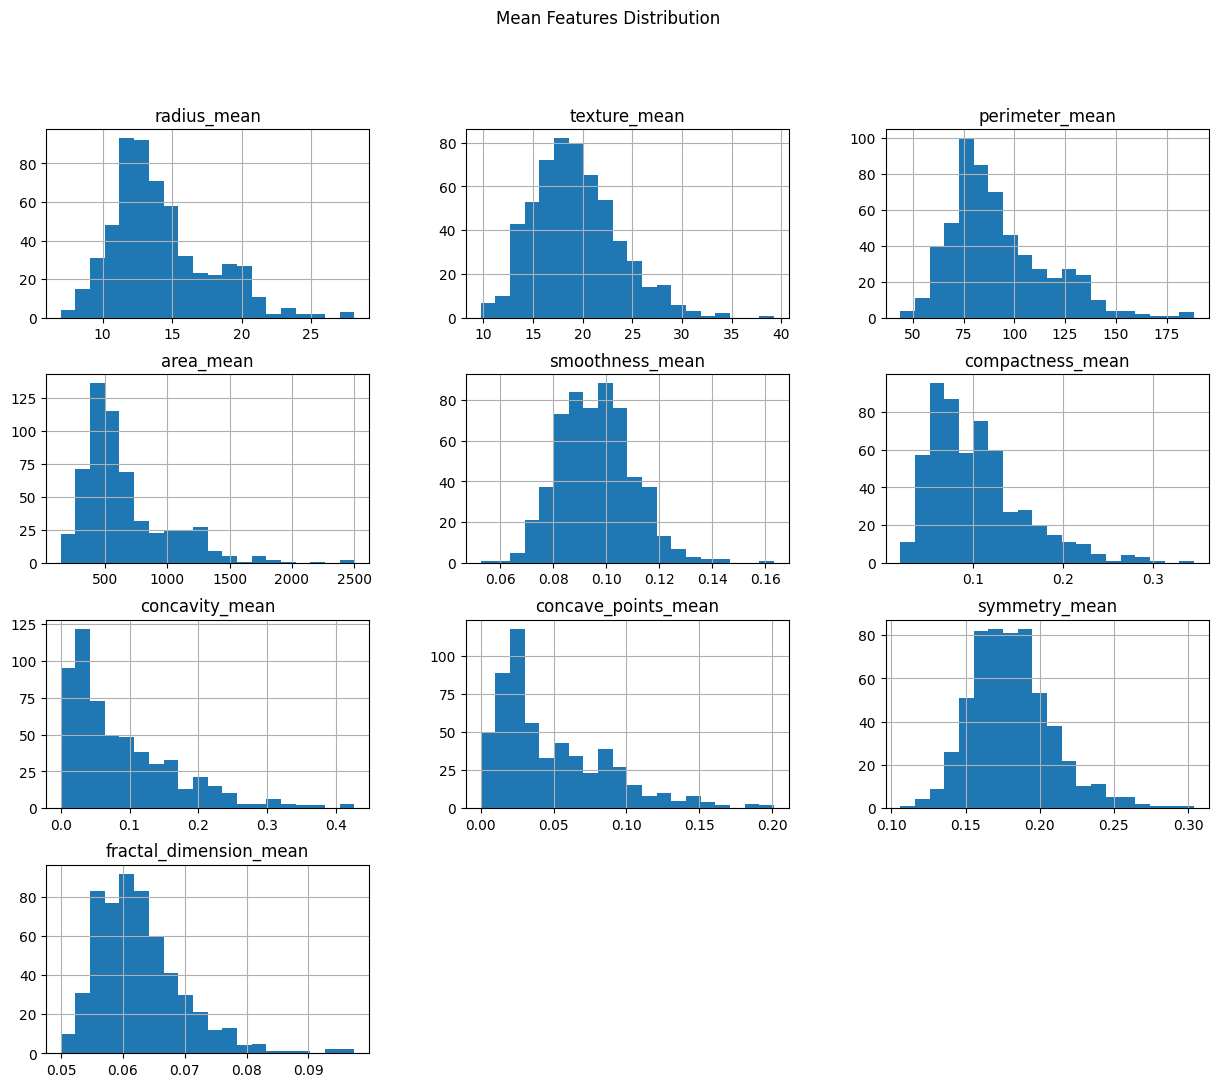

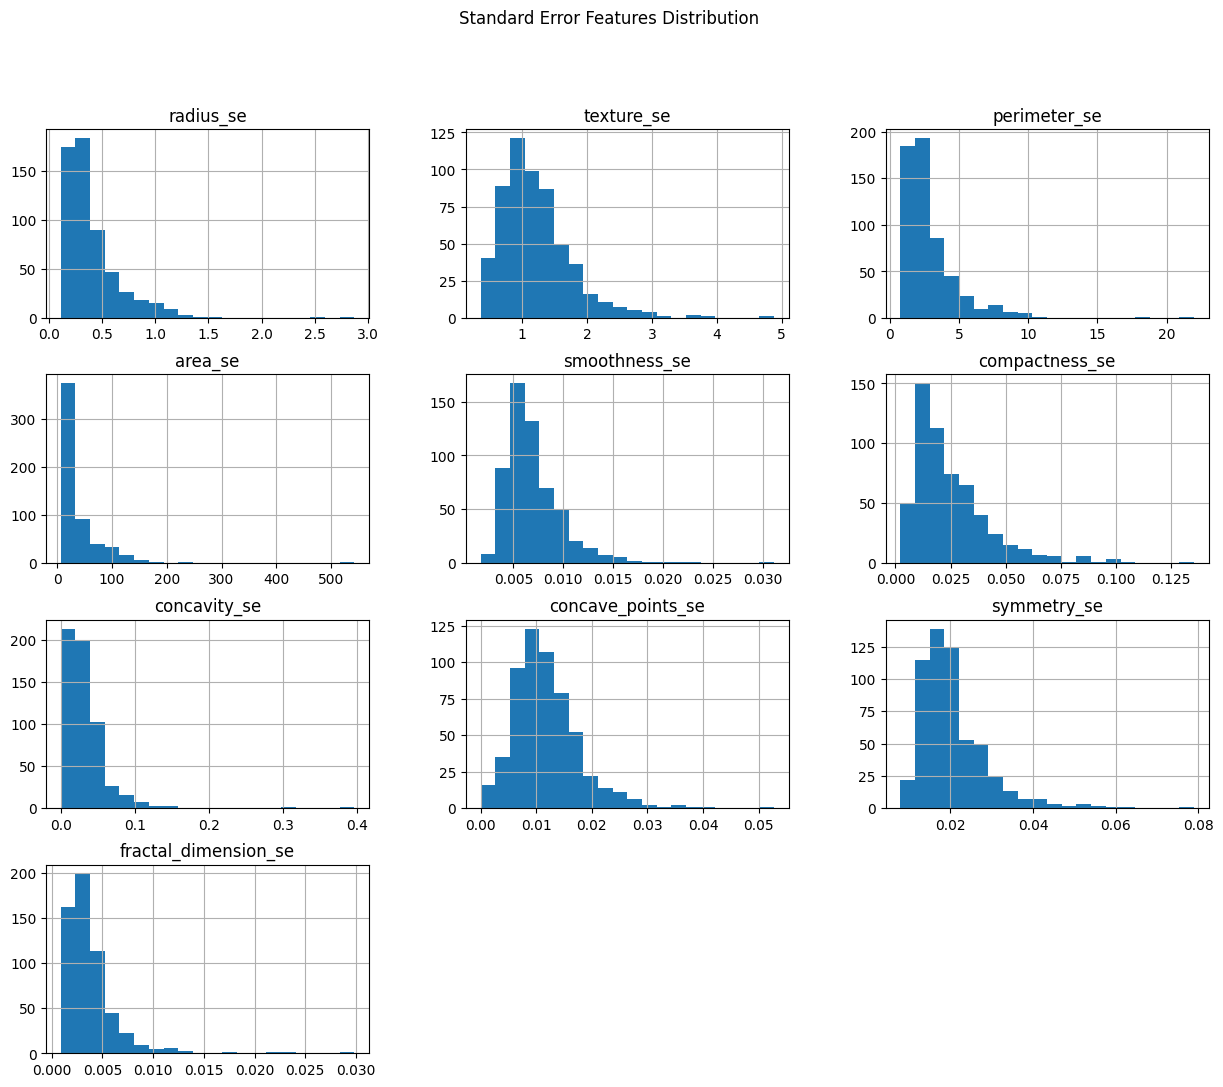

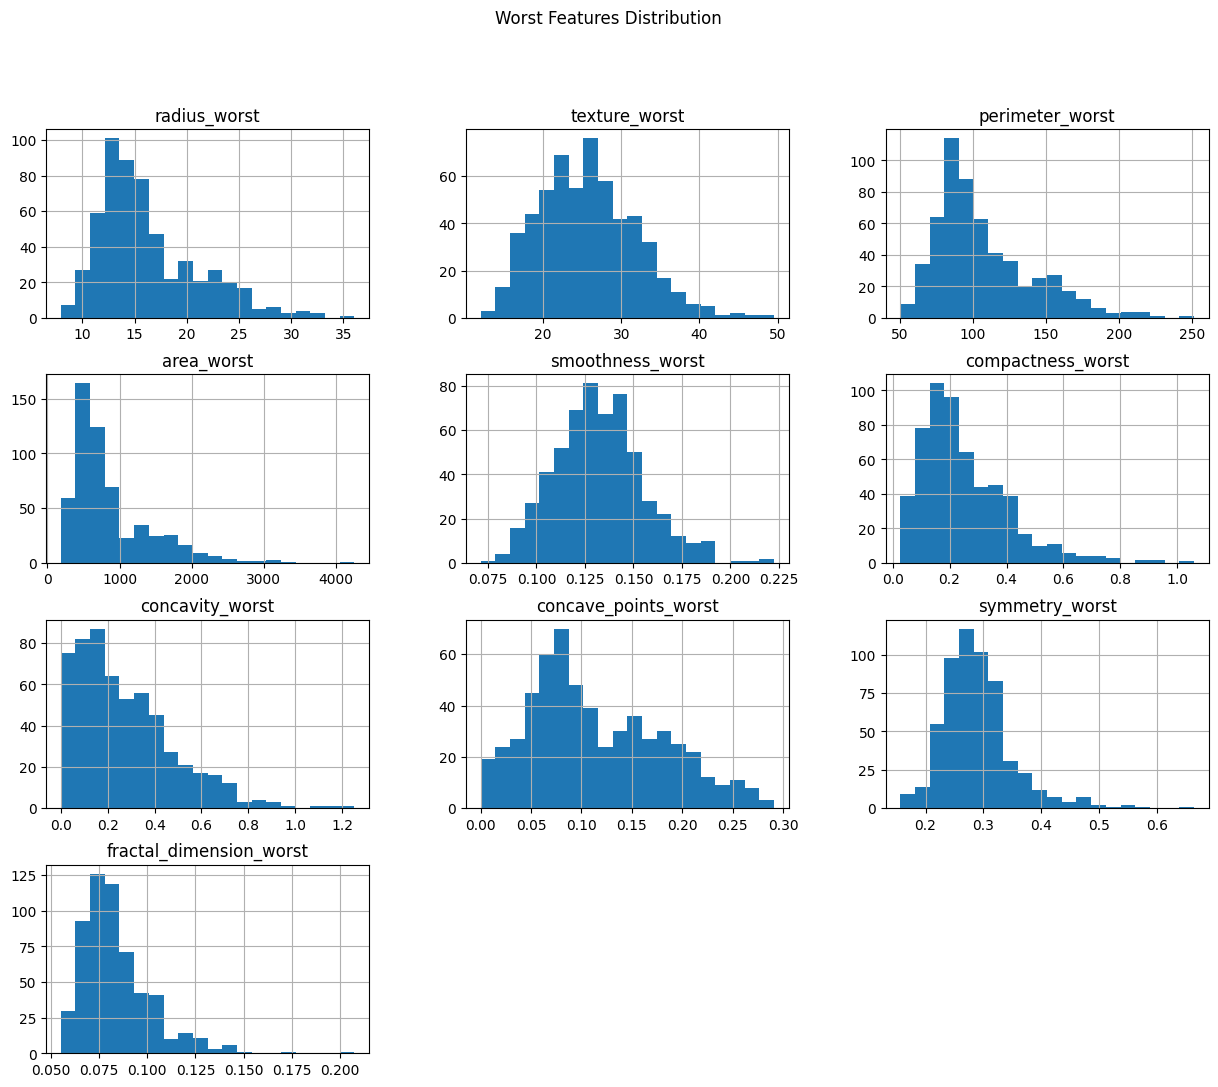

In [15]:
mean_features = [col for col in df.columns if '_mean' in col]
se_features = [col for col in df.columns if '_se' in col]
worst_features = [col for col in df.columns if '_worst' in col]
def plot_feature_distributions(features, title):
    df[features].hist(figsize=(15, 12), bins=20)
    plt.suptitle(title)
    plt.show()

plot_feature_distributions(mean_features, "Mean Features Distribution")
plot_feature_distributions(se_features, "Standard Error Features Distribution")
plot_feature_distributions(worst_features, "Worst Features Distribution")


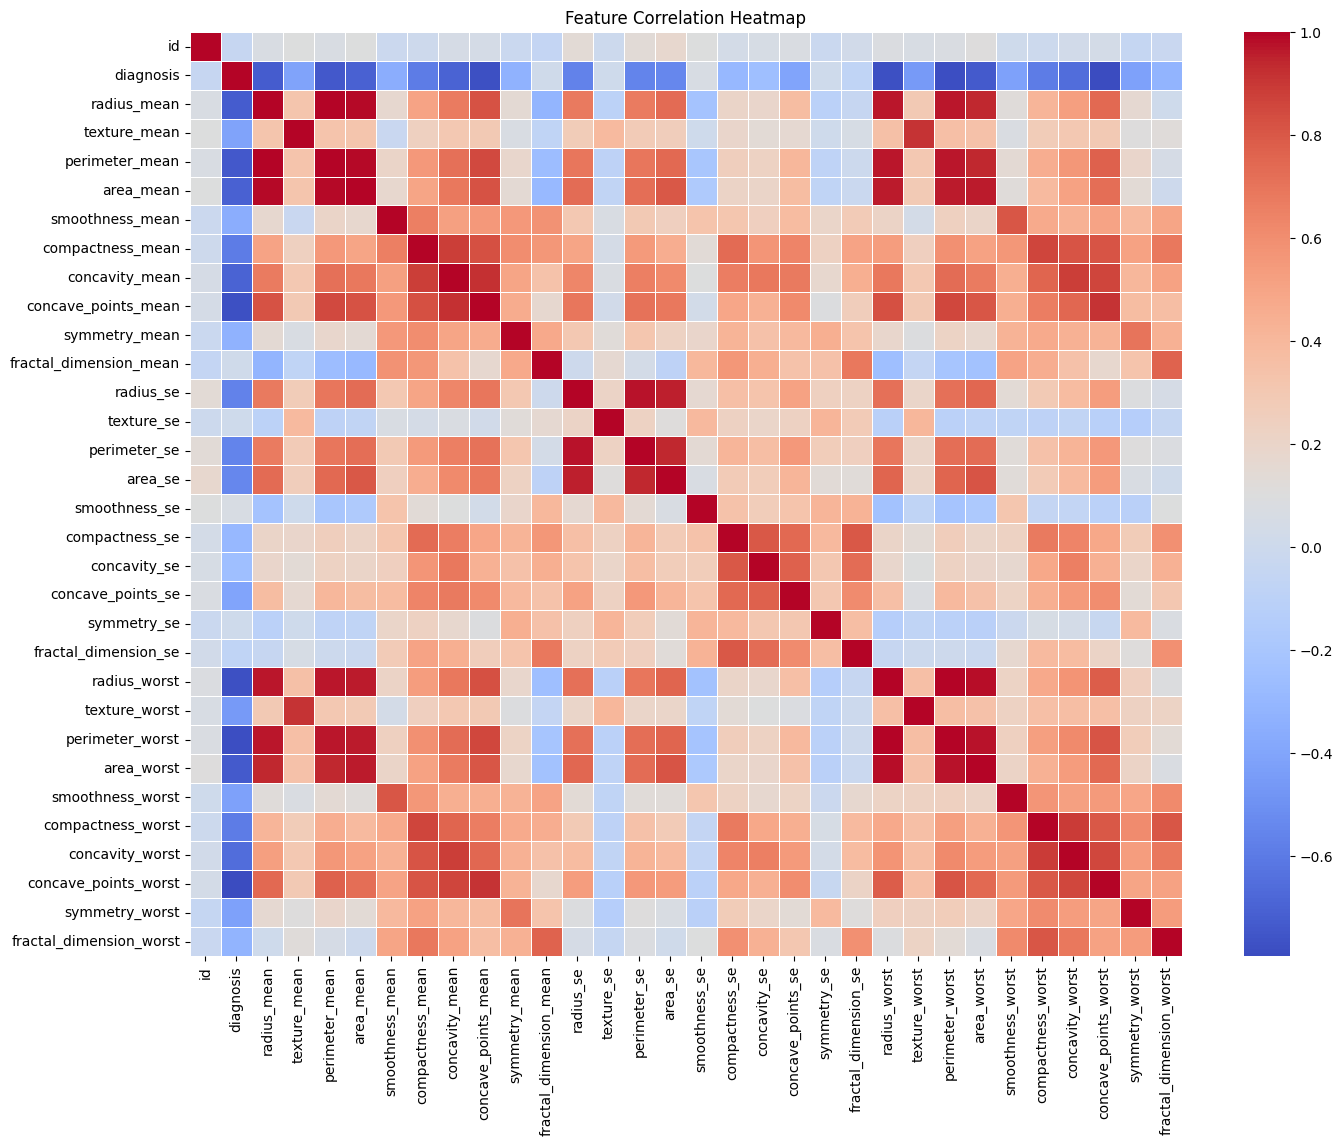

In [16]:
# CA
# Correlation matrix (heatmap)
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:

threshold = 0.5
high_corr_features = corr_matrix.index[abs(corr_matrix['diagnosis']) > threshold].tolist()
high_corr_features.remove('diagnosis')  # Remove the target variable
print(f"Highly correlated features with diagnosis (|corr| > {threshold}):")
high_corr_features


Highly correlated features with diagnosis (|corr| > 0.5):


['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

Red shades indicate strong positive correlation.

Blue shades indicate strong negative correlation.

White/light colors indicate weak or no correlation.

Key Insights from This Heatmap

1. High Correlation Between Radius, Perimeter, and Area
Features like:

radius_mean

perimeter_mean

area_mean

and their _worst counterparts
are all strongly positively correlated (deep red blocks).

These features measure size or extent, so this makes intuitive sense.

2. Diagnosis (Malignant or Benign)

diagnosis has strong positive correlations with:

radius_mean, perimeter_mean, area_mean

concavity_mean, concave_points_mean, compactness_mean

And negative correlations with:

fractal_dimension_mean

This means larger tumors and those with irregular shapes are more likely to be malignant (M).

3. Mean, SE, and Worst Variants Are Correlated

Example: radius_mean, radius_se, and radius_worst are all positively correlated.

Similar patterns are visible for concavity, compactness, etc.

4. Low Correlation Features
Features like smoothness_se, texture_se, and fractal_dimension_se are weakly correlated with most other features (light colors).

These may have less predictive power for classification tasks.

In [18]:
# CA
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

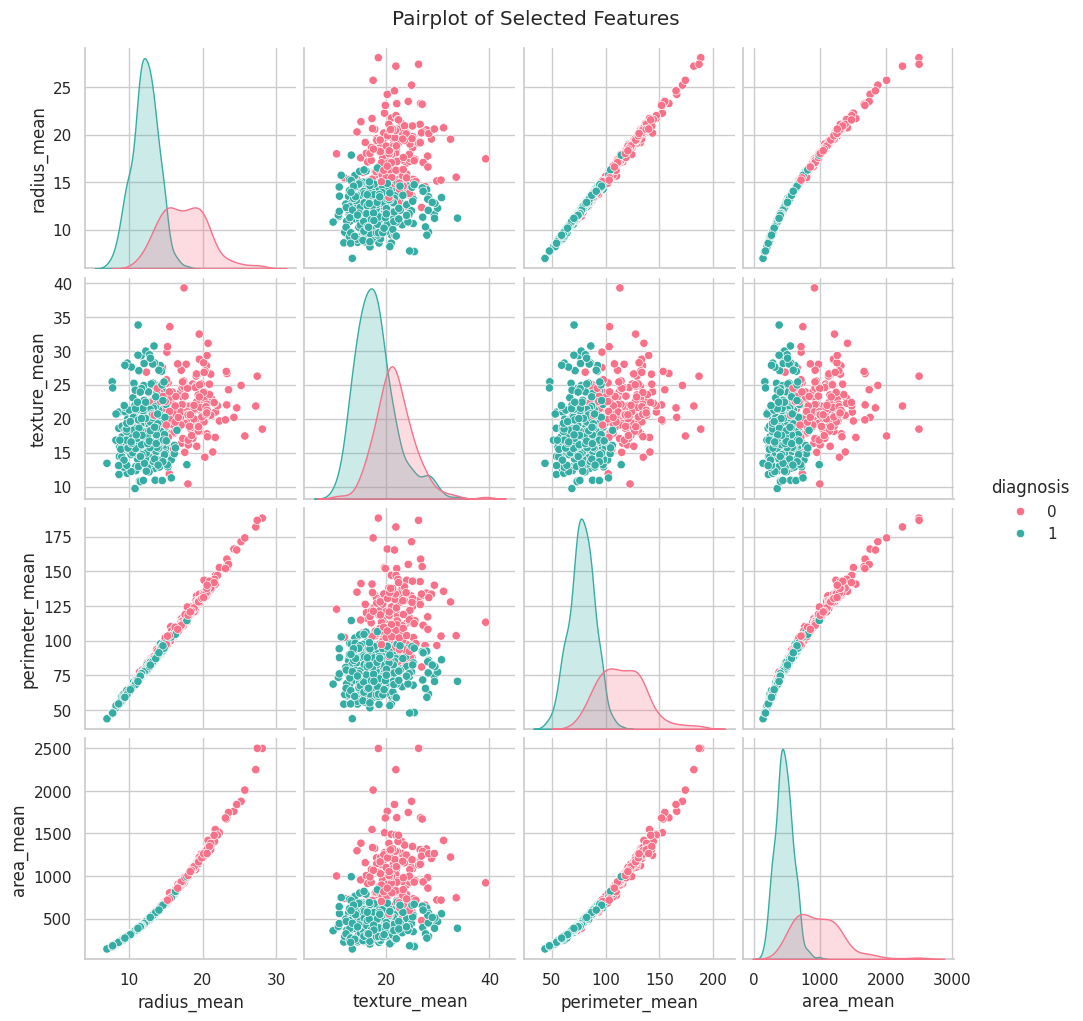

In [19]:
# CA
# Pairplot (visualize relationships) — subset for performance
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

<ipython-input-47-9109754b2a8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='pastel')
<ipython-input-47-9109754b2a8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='pastel')
<ipython-input-47-9109754b2a8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='pastel')


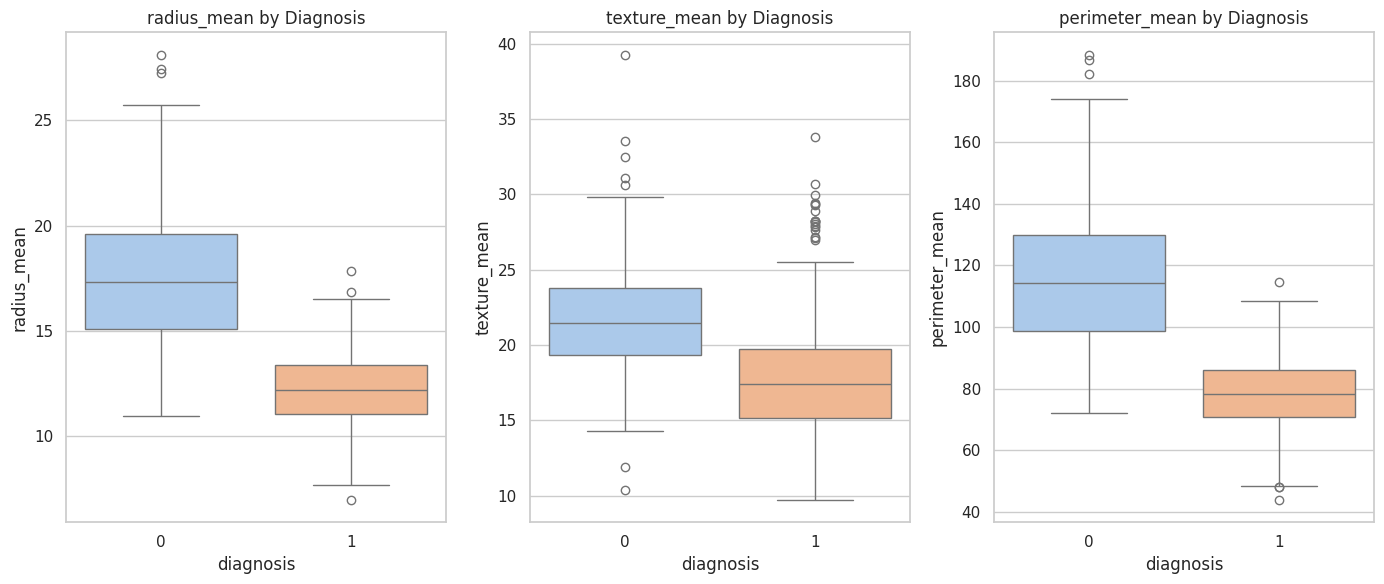

In [47]:
# CA
# Boxplots to compare distributions of key features
plt.figure(figsize=(14, 6))
for i, feature in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='pastel')
    plt.title(f"{feature} by Diagnosis")
plt.tight_layout()
plt.show()

In [20]:
df.drop(['id'], axis=1, inplace=True)

### Dataset Overview: Breast Cancer Diagnosis And Feature Selection

This dataset is based on digitized images of fine needle aspirates (FNA) of breast masses. The goal is to classify tumors as **malignant (M)** or **benign (B)** based on 30 numeric features.

---

####  Target Column:
- **`diagnosis`**:  
  - The class label indicating the nature of the tumor.  
  - Encoded as:  
    - `M` = Malignant (cancerous)  
    - `B` = Benign (non-cancerous)  

---

#### Feature Columns (30 Total):

Each of the 10 core features is measured in **three forms**:
- `mean`: Average value over the tumor cell nuclei.
- `se`: Standard error (variation in the measurement).
- `worst`: Worst (largest) value for that feature.

| Feature Group | Feature Name Examples | Description |
|---------------|------------------------|-------------|
| **Radius** | `radius_mean`, `radius_se`, `radius_worst` | Distance from center to tumor edges |
| **Texture** | `texture_mean`, ... | Variation in gray-level pixel values |
| **Perimeter** | `perimeter_mean`, ... | Length of tumor boundary |
| **Area** | `area_mean`, ... | Area covered by the tumor |
| **Smoothness** | `smoothness_mean`, ... | Variation in radius lengths (edge smoothness) |
| **Compactness** | `compactness_mean`, ... | `(perimeter² / area) - 1.0`, tightness of mass |
| **Concavity** | `concavity_mean`, ... | Severity of concave sections |
| **Concave Points** | `concave points_mean`, ... | Number of concave sections |
| **Symmetry** | `symmetry_mean`, ... | Symmetry of the tumor shape |
| **Fractal Dimension** | `fractal_dimension_mean`, ... | Roughness or complexity of tumor boundary |

---

####  Summary
- **Total columns**: `ID` (optional), `diagnosis`, and **30 numeric features**.
- **Goal**: Build a machine learning model to accurately predict whether a tumor is malignant or benign based on these features.


In [21]:
df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0
symmetry_mean,0


 # PREPARE FEATURE LABELS AND SPLIT YOUR DATA INTO TEST AND TRAIN**

In [22]:
# CA
print("="*100)
print(" PREPARE FEATURE LABELS AND SPLIT YOUR DATA INTO TEST AND TRAIN")
print("="*100)

 PREPARE FEATURE LABELS AND SPLIT YOUR DATA INTO TEST AND TRAIN


In [23]:
high_corr_features

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

So, after checking te correlation of the fwatures we will pick the most correlted fetaures to be our x varibables

Also, we fixed the class imbalances

<ipython-input-24-6af6aadedb58>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='Set2')


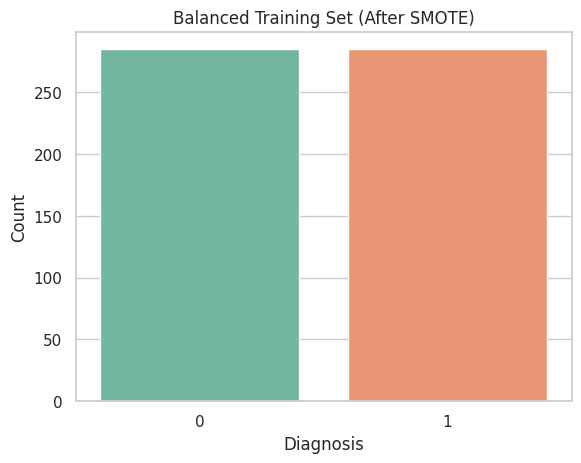

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd





# Features and Labels
X = df[high_corr_features]
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Optional: Check class balance after SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_res, palette='Set2')
plt.title("Balanced Training Set (After SMOTE)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

And now our two classses 0 and 1 are balanced

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.32656197,  1.4891412 ,  1.36684779, ...,  1.50939668,
         0.49487778,  0.95838938],
       [-0.9865    , -1.0214357 , -0.90618111, ..., -1.33034518,
        -1.23779944, -1.28348209],
       [-0.2475289 , -0.15209923, -0.31501196, ...,  0.68711371,
         0.0974538 ,  0.34561702],
       ...,
       [ 0.16453677,  0.2801829 ,  0.00809447, ...,  1.01107993,
         0.57618982,  1.37857615],
       [-0.57718144, -0.58875588, -0.58885428, ...,  0.37822972,
         0.33956266, -0.15189579],
       [-0.83540926, -0.8217985 , -0.79774506, ..., -0.81447272,
        -0.76637236, -0.44150368]])

<ipython-input-34-7b9832777f02>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")


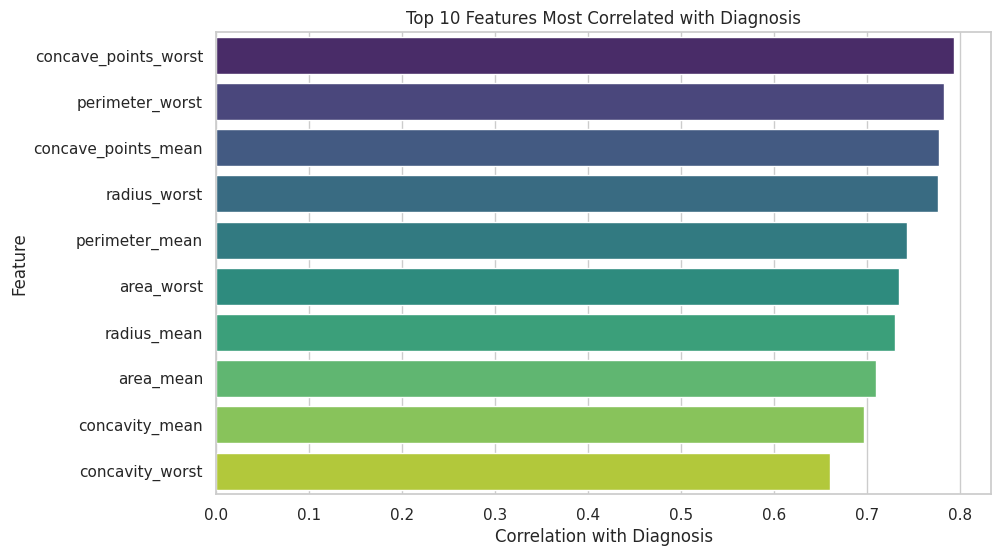

In [34]:
# CA
# Top 10 features most correlated with diagnosis
top_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")
plt.title("Top 10 Features Most Correlated with Diagnosis")
plt.xlabel("Correlation with Diagnosis")
plt.ylabel("Feature")
plt.show()

# MODEL SELECTION AND TRAINING

**1. Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


model = LogisticRegression(random_state=42)


model.fit(X_train_scaled, y_train_res)




LogisticRegression(random_state=42)

In [27]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


Confusion Matrix:
 [[41  1]
 [ 3 69]]




Precision	Of all predicted positives (diagnosis=1), how many were correct?

For class 1: 0.99 (very high)

Recall	Of all actual positives, how many did the model detect?	For class 1: 0.96 (also very high)

F1-score	Harmonic mean of precision and recall — balance of both	For class 1: 0.97 (excellent)

Support	Number of true instances in each class	Class 0: 42, Class 1: 72

Class 0 corresponds to benign (B)

Class 1 corresponds to malignant (M)

Your model is very precise and sensitive in detecting malignant cases (class 1), which is great because catching malignant tumors correctly is crucial.

Confusion Matrix Explained

Predicted Negative (0)	Predicted Positive (1)

Actual Negative (0)	41 (True Negative)	1 (False Positive)

Actual Positive (1)	3 (False Negative)	69 (True Positive)

True Positives (69): Correctly predicted malignant tumors.

True Negatives (41): Correctly predicted benign tumors.

False Positives (1): Benign tumor predicted as malignant — slight overdiagnosis.

False Negatives (3): Malignant tumor predicted as benign — important to minimize in medical diagnosis.

**2. Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train on the balanced and scaled training data
rf_model.fit(X_train_scaled, y_train_res)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[40  2]
 [ 3 69]]


Precision for malignant (1): 97% — When it predicts cancer, it's right 97% of the time.

Recall for malignant (1): 96% — It catches 96% of all actual malignant cases.

Overall: Very balanced performance across classes, slightly more robust to class imbalance than logistic regression.

Confusion Matrix Explained


Predicted Benign (0)	Predicted Malignant (1)

Actual Benign (0)	40 (True Negative)	2 (False Positive)

Actual Malignant (1)	3 (False Negative)	69 (True Positive)

 True Positives (69) — Correctly predicted malignant tumors.

 True Negatives (40) — Correctly predicted benign tumors.

 False Positives (2) — Benign predicted as malignant.

 False Negatives (3) — Malignant predicted as benign (same as Logistic Regression).

**3. Support Vector Machine (SVM)**

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model (you can start with a linear kernel or try 'rbf' as well)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model on resampled and scaled training data
svm_model.fit(X_train_scaled, y_train_res)

SVC(random_state=42)

In [37]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
 [[40  2]
 [ 4 68]]


Precision:

Class 0 (Benign): 91% of the predicted benign cases were correct.

Class 1 (Malignant): 97% of the predicted malignant cases were correct.

Recall:

Class 0: Detected 95% of actual benign cases.

Class 1: Detected 94% of actual malignant cases.

F1-Score: The harmonic mean of precision and recall. Both classes have strong F1-scores, showing the model is well-balanced.


True Positives (TP): 68 (Malignant predicted as Malignant)

True Negatives (TN): 40 (Benign predicted as Benign)

False Positives (FP): 2 (Benign predicted as Malignant)

False Negatives (FN): 4 (Malignant predicted as Benign)

Summary


The SVM performs very well, with slightly lower accuracy than Logistic Regression and Random Forest in your earlier tests.

It misclassified 6 total samples: 2 benign as malignant, and 4 malignant as benign.

**Hyperparameter Tuning with GridSearchCV for SVM**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize SVM
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           cv=5,           # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,      # Use all processors
                           verbose=2)

# Fit to training data
grid_search.fit(X_train_scaled, y_train_res)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Score on Training Set:", grid_search.best_score_)

# Use best estimator to predict on test data
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate performance on test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score on Training Set: 0.968421052631579
Tuned SVM Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.97      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[42  0]
 [ 2 70]]


C = 100 → A high regularization penalty, meaning the model prioritizes minimizing classification errors (may slightly risk overfitting).

gamma = 0.1 → Moderate influence from individual data points — helps the model capture some non-linearity.

kernel = 'rbf' → A good choice for complex decision boundaries.


 Interpretation:


Our tuned SVM model outperforms both the earlier Logistic Regression and Random Forest:

Best accuracy so far

Excellent balance between precision and recall

Minimal false negatives (very important in diagnosis tasks)

# Plot ROC & AUC Curves for Logistic Regression, Random Forest, and SVM:

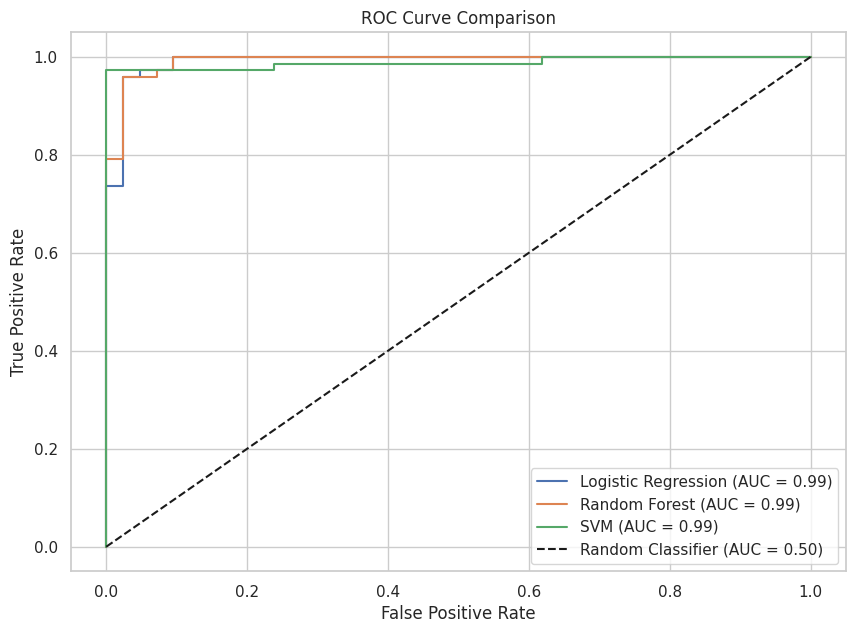

In [40]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Re-train the models using probability=True for SVM
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True, C=100, gamma=0.1, kernel='rbf')
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Cross-Validation for Multiple Models**

In [43]:
from sklearn.pipeline import Pipeline

models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('clf', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(C=100, gamma=0.1, kernel='rbf', probability=True))
    ])
}


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': RandomForestClassifier(),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(C=100, gamma=0.1, kernel='rbf', probability=True, class_weight='balanced'))
    ])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Logistic Regression Accuracy: 0.9473 ± 0.0183
Random Forest Accuracy: 0.9420 ± 0.0189
SVM Accuracy: 0.9561 ± 0.0135


 SVM is performing great with cross-validation — about 95.6% accuracy ± 1.35%, which is solid and better than before.

The pipeline with scaling + class_weight balanced really helped.

Looks like your models are all strong now:

Logistic Regression ~94.7%

Random Forest ~94.2%

SVM ~95.6%

# SAVE THE MODEL
After training the models, we found out thet SVMperofmed better than the rest of othe rmodels hence picked it up for our testing and saved the model

In [48]:

import joblib

_

# Save the model to a file
joblib.dump(best_svm, 'svm_model.pkl')


['svm_model.pkl']

In [50]:
import joblib

# Load the model from the file
loaded_svm = joblib.load('svm_model.pkl')

# Use loaded_svm to predict
predictions = loaded_svm.predict(X_test_scaled)
predictions


array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

# ETHICAL CONSIDERATION AND BIAS

In [33]:
# CA
print("="*100)
print(" ⚖️ ETHICAL CONSIDERATION AND BIAS ")
print("="*100)

 ⚖️ ETHICAL CONSIDERATION AND BIAS 


### ⚖️ Ethical Considerations and Bias

**Ethical & Bias Notes:**

- ⚖️ **Class Balance**: The dataset is slightly imbalanced but not extreme( but we fixed that).
- 🚨 **Priority**: Minimizing false negatives is critical in medical diagnostics.
- 🔍 **Interpretability**: Logistic Regression offers transparency; black-box models like RF and SVM need SHAP/LIME.
- 🧠 **Decision Support**: This model is a tool, not a replacement for professional medical diagnosis.
- 🔐 **Data Privacy**: Use anonymized data and comply with laws like HIPAA/GDPR.

---

**✅ Conclusion**  
With the right validation and deployment strategies, this model can assist in early breast cancer detection.
